# <center style="font-family:Arial">1. Introduction </center>

<div class="alert alert-block alert-info"
     style="color:black;
           display:fill;
           background-color:#e8f4f8;
           font-size:130%;
           font-family:Arial"><center>
<b> 📌 My goal is to predict, in the best possible way, the sales price of the houses based on their characteristics using different linear regression models.</b></center>
    </div>
    
 <div style="color:black;
           font-size:120%;
           font-family:Arial">
In this notebook, I'll be working with the Ames Housing dataset, a complete dataset containing every aspect of residential homes in Ames, Iowa. If you want to know more about the data, you can click <a href="https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data" target="_blank"> here</a>.
</div>

** note I have obtained complete train and test dataset from a udemy course. The above link is just for reference.


## <center style="font-family:Arial">Importing the Data </center>



In [140]:
import warnings
warnings.filterwarnings('ignore')

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## <center> 1. Importing the dataset <center>

In [142]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [143]:
df = pd.read_csv("/content/drive/MyDrive/UNZIP_FOR_NOTEBOOKS_FINAL/DATA/Ames_Housing_Data.csv")
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,...,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,...,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,...,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,...,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,...,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,...,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


## <center> 2. E.D.A. <center>

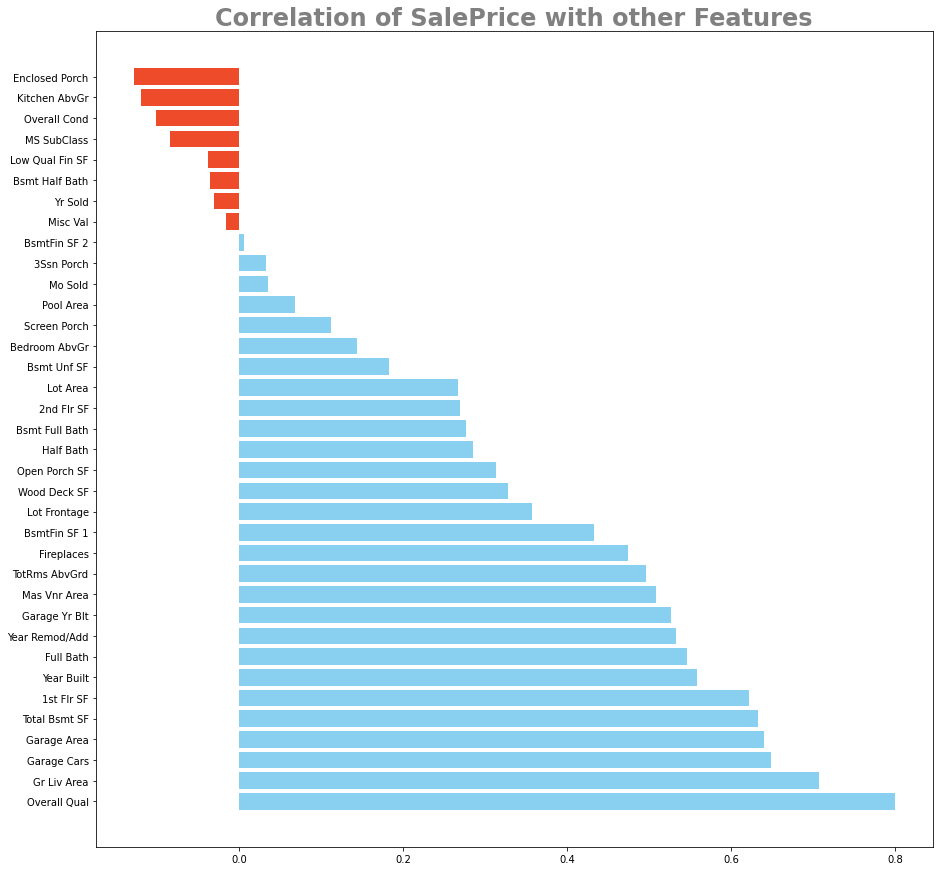

In [144]:
corr = df.corr()['SalePrice'].sort_values(ascending=False).to_frame()
corr = corr.iloc[1:-1,:] # getting rid of PID and SalePrice,Considering only numerical values

fig, ax = plt.subplots(figsize=(15,15))
plt.barh(corr.index,corr.SalePrice, color = np.where(corr['SalePrice'] < 0, '#EE4B2B', '#89CFF0'))
ax.set_title( "Correlation of SalePrice with other Features", size=24, color="grey", fontweight="bold");

In [145]:
print('Top correlated features: \n ',corr.iloc[:3,:])  # Removing outliers by visual inspection of top correlated numerical features

Top correlated features: 
                SalePrice
Overall Qual   0.799262
Gr Liv Area    0.706780
Garage Cars    0.647877


## <center> 3. Data Cleaning<center>

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

Text(0.5, 0, 'GarageCars')

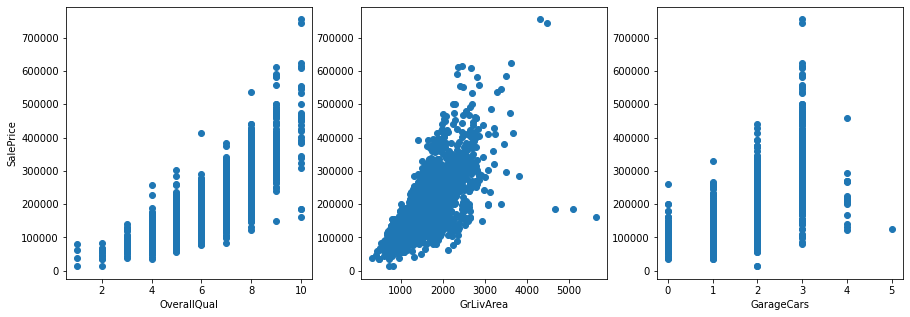

In [147]:
# First lets visualize the correlation of top 3 correlated features to SalePrice

fig, ax = plt.subplots(1,3,figsize=(15,5))

ax[0].scatter(df['Overall Qual'],df['SalePrice'])
ax[1].scatter(df['Gr Liv Area'],df['SalePrice'])
ax[2].scatter(df['Garage Cars'],df['SalePrice'])

ax[0].set_ylabel('SalePrice')
ax[0].set_xlabel('OverallQual')
ax[1].set_xlabel('GrLivArea')
ax[2].set_xlabel('GarageCars')

### (a.) Dealing with outliers

In the above graphs SalePrice is highly correalted with all three features but we can see some outliers:
For example in the first graph Price increases with the Overall Quality but we can some datapoints having very high quality but very low price

Similiarly in the second and third graphs there are some data points with large GrLivArea and high GarageCars but have low Sale Price.

We can already imagine that all these data points in these graphs are the same. Lets find out these datapoints.


In [148]:
df[(df['Overall Qual']>8) & (df['SalePrice']<200000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,...,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Veenker,Norm,Norm,1Fam,2Story,9,3,1977,1977,Mansard,CompShg,Wd Sdng,Wd Sdng,BrkFace,1050.0,Gd,Gd,CBlock,Gd,TA,No,GLQ,410.0,Unf,0.0,584.0,994.0,GasA,...,Y,SBrkr,1599,1345,0,2944,0.0,0.0,2,2,3,1,Gd,9,Typ,1,Gd,Attchd,1977.0,RFn,3.0,864.0,TA,TA,Y,140,70,16,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644.0,Unf,0.0,466.0,6110.0,GasA,...,Y,SBrkr,4692,950,0,5642,2.0,0.0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2.0,1418.0,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,4010.0,Unf,0.0,1085.0,5095.0,GasA,...,Y,SBrkr,5095,0,0,5095,1.0,1.0,2,1,2,1,Ex,15,Typ,2,Gd,Attchd,2008.0,Fin,3.0,1154.0,TA,TA,Y,546,484,0,0,0,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260.0,Unf,0.0,878.0,3138.0,GasA,...,Y,SBrkr,3138,1538,0,4676,1.0,0.0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3.0,884.0,TA,TA,Y,208,406,0,0,0,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [149]:
df[(df['Gr Liv Area']>4000) & (df['SalePrice']<250000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,...,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644.0,Unf,0.0,466.0,6110.0,GasA,...,Y,SBrkr,4692,950,0,5642,2.0,0.0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2.0,1418.0,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,4010.0,Unf,0.0,1085.0,5095.0,GasA,...,Y,SBrkr,5095,0,0,5095,1.0,1.0,2,1,2,1,Ex,15,Typ,2,Gd,Attchd,2008.0,Fin,3.0,1154.0,TA,TA,Y,546,484,0,0,0,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260.0,Unf,0.0,878.0,3138.0,GasA,...,Y,SBrkr,3138,1538,0,4676,1.0,0.0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3.0,884.0,TA,TA,Y,208,406,0,0,0,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [150]:
Overall_qual_outliers = df[(df['Overall Qual']>8) & (df['SalePrice']<250000)].index
Gr_Liv_outliers = df[(df['Gr Liv Area']>4000) & (df['SalePrice']<250000)].index

df = df.drop(Overall_qual_outliers, axis= 0)

Text(0.5, 0, 'GarageCars')

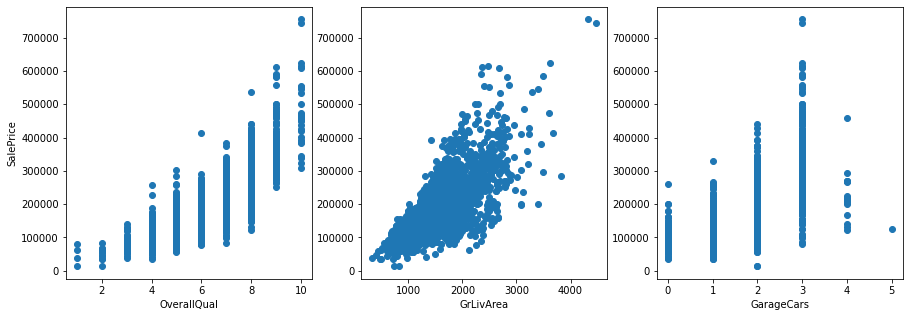

In [151]:
fig, ax = plt.subplots(1,3,figsize=(15,5))

ax[0].scatter(df['Overall Qual'],df['SalePrice'])
ax[1].scatter(df['Gr Liv Area'],df['SalePrice'])
ax[2].scatter(df['Garage Cars'],df['SalePrice'])

ax[0].set_ylabel('SalePrice')
ax[0].set_xlabel('OverallQual')
ax[1].set_xlabel('GrLivArea')
ax[2].set_xlabel('GarageCars')

### 4 outliers are removed
---
---
## Now lets handle the missing data.

In [152]:
df.shape

(2924, 81)

In [153]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,...,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,...,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,...,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,...,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,...,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,...,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


### Column PID is not required as we have as seperate index column qnd PID does not hold any information.

In [154]:
df = df.iloc[:,1:]                    #dropping ID column
df.columns

Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Gara

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2924 entries, 0 to 2929
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2924 non-null   int64  
 1   MS Zoning        2924 non-null   object 
 2   Lot Frontage     2435 non-null   float64
 3   Lot Area         2924 non-null   int64  
 4   Street           2924 non-null   object 
 5   Alley            198 non-null    object 
 6   Lot Shape        2924 non-null   object 
 7   Land Contour     2924 non-null   object 
 8   Utilities        2924 non-null   object 
 9   Lot Config       2924 non-null   object 
 10  Land Slope       2924 non-null   object 
 11  Neighborhood     2924 non-null   object 
 12  Condition 1      2924 non-null   object 
 13  Condition 2      2924 non-null   object 
 14  Bldg Type        2924 non-null   object 
 15  House Style      2924 non-null   object 
 16  Overall Qual     2924 non-null   int64  
 17  Overall Cond  

### Lets get a sorted of number of null values in each column.

In [156]:
df.isnull().sum().sort_values(ascending = False)

Pool QC           2912
Misc Feature      2819
Alley             2726
Fence             2352
Fireplace Qu      1421
                  ... 
2nd Flr SF           0
1st Flr SF           0
Central Air          0
Sale Condition       0
MS SubClass          0
Length: 80, dtype: int64

In [157]:
null_cols=(((df.isnull().sum())/df.shape[0])*100).sort_values(ascending = False).head(10)
null_cols

Pool QC          99.589603
Misc Feature     96.409029
Alley            93.228454
Fence            80.437756
Fireplace Qu     48.597811
Lot Frontage     16.723666
Garage Cond       5.437756
Garage Qual       5.437756
Garage Yr Blt     5.437756
Garage Finish     5.437756
dtype: float64

In [158]:
# Do we have duplicates?
print('Number of Duplicates:', len(df[df.duplicated()]))

# Do we have missing values?
print('Number of Missing Values:', df.isnull().sum().sum())

Number of Duplicates: 0
Number of Missing Values: 13973


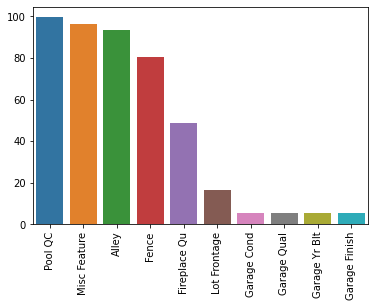

In [159]:
sns.barplot(x=null_cols.index,y=null_cols)
plt.xticks(rotation=90);

Sometimes it is a good idea to remove a feature entirely if it has too many null values. However, you should carefully consider why it has so many null values, in certain situations null could just be used as a separate category.

Take for example a feature column for the number of cars that can fit into a garage. Perhaps if there is no garage then there is a null value, instead of a zero. It probably makes more sense to quickly fill the null values in this case with a zero instead of a null. Only you can decide based off your domain expertise and knowledge of the data set.

---

In [160]:
print('Count of Features per Data Type:')
df.dtypes.value_counts() 

Count of Features per Data Type:


object     43
int64      26
float64    11
dtype: int64

In [161]:
garage_cols = df.columns[df.columns.str.startswith('Garage')]
garage_cols

Index(['Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars',
       'Garage Area', 'Garage Qual', 'Garage Cond'],
      dtype='object')

In [162]:
bsmt_cols = df.columns[df.columns.str.startswith('Bsmt')]
bsmt_cols

Index(['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1',
       'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Bsmt Full Bath', 'Bsmt Half Bath'],
      dtype='object')

In [163]:
mas_cols = df.columns[df.columns.str.startswith('Mas')]
mas_cols

Index(['Mas Vnr Type', 'Mas Vnr Area'], dtype='object')

In [164]:
for cols in df[garage_cols].select_dtypes(exclude='object'):
    df[cols] = df[cols].fillna(0)
    
for cols in df[garage_cols].select_dtypes(include='object'):
    df[cols] = df[cols].fillna('None')
    
for cols in df[bsmt_cols].select_dtypes(exclude='object'):
    df[cols] = df[cols].fillna(0)
    
for cols in df[bsmt_cols].select_dtypes(include='object'):
    df[cols] = df[cols].fillna('None')

All the features that start with Mas and contain NaN means that those houses don't have a masonry veneer

In [165]:
for cols in df[mas_cols].select_dtypes(exclude='object'):
    df[cols] = df[cols].fillna(0)
    
for cols in df[mas_cols].select_dtypes(include='object'):
    df[cols] = df[cols].fillna('None')

PoolQC refers to the pool quality of the house. Data description says that having a NaN in this category means that the house doesn't have a pool.</div>

In [166]:
df['Pool QC'] = df['Pool QC'].fillna('None')

MiscFeature refers to miscellaneous features of the house. Data description says that having a NaN in this category means that the house doesn't have any.</div>

In [167]:
df['Misc Feature'] = df['Misc Feature'].fillna('None')

Alley refers to the type of alley access to the property. Data description says that having a NaN in this category means that the house doesn't have any.</div>

In [168]:
df['Alley'] = df['Alley'].fillna('None')

Fence refers to the type of fencing around the property. Data description says that having a NaN in this category means that the house doesn't have a fence.</div>


In [169]:
df['Fence'] = df['Fence'].fillna('None')

FireplaceQu refers to the quality of the fireplace. Data description says that having a NaN in this category means that the house doesn't have a fireplace.</div>

In [170]:
df['Fireplace Qu'] = df['Fireplace Qu'].fillna('None')

LotFrontage refers to the distance in feet between the street and the property. Let's impute the missing values with the median of the neighborhood.</div>

In [171]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda i: i.fillna(i.median()))
df

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,None,None,None,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,None,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,None,MnPrv,None,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,None,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,None,None,Gar2,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,None,None,None,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,None,MnPrv,None,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,80,RL,37.0,7937,Pave,None,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,6,6,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,Av,GLQ,819.0,Unf,0.0,184.0,1003.0,GasA,TA,Y,SBrkr,1003,0,0,1003,1.0,0.0,1,0,3,1,TA,6,Typ,0,None,Detchd,1984.0,Unf,2.0,588.0,TA,TA,Y,120,0,0,0,0,0,None,GdPrv,None,0,3,2006,WD,Normal,142500
2926,20,RL,74.0,8885,Pave,None,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,5,5,1983,1983,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,Gd,TA,Av,BLQ,301.0,ALQ,324.0,239.0,864.0,GasA,TA,Y,SBrkr,902,0,0,902,1.0,0.0,1,0,2,1,TA,5,Typ,0,None,Attchd,1983.0,Unf,2.0,484.0,TA,TA,Y,164,0,0,0,0,0,None,MnPrv,None,0,6,2006,WD,Normal,131000
2927,85,RL,62.0,10441,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,None,None,0.0,None,0.0,0.0,None,None,Y,80,32,0,0,0,0,None,MnPrv,Shed,700,7,20

In [172]:
null_cols=(((df.isnull().sum())/df.shape[0])*100).sort_values(ascending = False).head(10)
null_cols

Lot Frontage     0.102599
Total Bsmt SF    0.034200
Electrical       0.034200
Bsmt Qual        0.000000
Exterior 1st     0.000000
Exterior 2nd     0.000000
Mas Vnr Type     0.000000
Mas Vnr Area     0.000000
Exter Qual       0.000000
Exter Cond       0.000000
dtype: float64

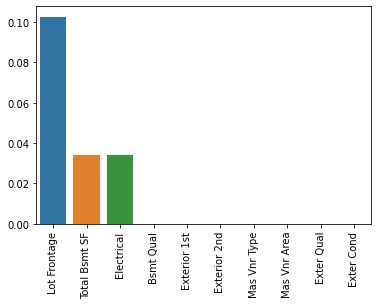

In [173]:
sns.barplot(x=null_cols.index,y=null_cols)
plt.xticks(rotation=90);

In [174]:
df['Lot Frontage'].isna().sum(), df['Electrical'].isna().sum(), df['Total Bsmt SF'].isna().sum()

(3, 1, 1)

### Now the remaining missing values are minimal so lets plug-in the missing values with modes of each column

In [175]:
# replace missing values for mode of each column
df = df.fillna(df.mode().iloc[0])

df['Lot Frontage'].isna().sum(), df['Electrical'].isna().sum(), df['Total Bsmt SF'].isna().sum()

(0, 0, 0)

In [176]:
null_cols=(((df.isnull().sum())/df.shape[0])*100).sort_values(ascending = False).head(10)
null_cols

SalePrice         0.0
Sale Condition    0.0
Roof Matl         0.0
Exterior 1st      0.0
Exterior 2nd      0.0
Mas Vnr Type      0.0
Mas Vnr Area      0.0
Exter Qual        0.0
Exter Cond        0.0
Foundation        0.0
dtype: float64

MSSubClass: Identifies the type of dwelling involved in the sale.

In [177]:
df['MS SubClass'] = df['MS SubClass'].apply(str)

Need to convert all categorical columns to numerical columns before performing the regression.

For this we will use dummies method available in Pandas library

In [178]:
df_nums = df.select_dtypes(exclude='object')
df_objs = df.select_dtypes(include='object')

In [179]:
df_objs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2924 entries, 0 to 2929
Data columns (total 44 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   MS SubClass     2924 non-null   object
 1   MS Zoning       2924 non-null   object
 2   Street          2924 non-null   object
 3   Alley           2924 non-null   object
 4   Lot Shape       2924 non-null   object
 5   Land Contour    2924 non-null   object
 6   Utilities       2924 non-null   object
 7   Lot Config      2924 non-null   object
 8   Land Slope      2924 non-null   object
 9   Neighborhood    2924 non-null   object
 10  Condition 1     2924 non-null   object
 11  Condition 2     2924 non-null   object
 12  Bldg Type       2924 non-null   object
 13  House Style     2924 non-null   object
 14  Roof Style      2924 non-null   object
 15  Roof Matl       2924 non-null   object
 16  Exterior 1st    2924 non-null   object
 17  Exterior 2nd    2924 non-null   object
 18  Mas Vnr 

In [180]:
df_nums.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2924 entries, 0 to 2929
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Lot Frontage     2924 non-null   float64
 1   Lot Area         2924 non-null   int64  
 2   Overall Qual     2924 non-null   int64  
 3   Overall Cond     2924 non-null   int64  
 4   Year Built       2924 non-null   int64  
 5   Year Remod/Add   2924 non-null   int64  
 6   Mas Vnr Area     2924 non-null   float64
 7   BsmtFin SF 1     2924 non-null   float64
 8   BsmtFin SF 2     2924 non-null   float64
 9   Bsmt Unf SF      2924 non-null   float64
 10  Total Bsmt SF    2924 non-null   float64
 11  1st Flr SF       2924 non-null   int64  
 12  2nd Flr SF       2924 non-null   int64  
 13  Low Qual Fin SF  2924 non-null   int64  
 14  Gr Liv Area      2924 non-null   int64  
 15  Bsmt Full Bath   2924 non-null   float64
 16  Bsmt Half Bath   2924 non-null   float64
 17  Full Bath     

In [181]:
df_objs = pd.get_dummies(df_objs, drop_first = True)

In [182]:
df_objs.shape

(2924, 252)

In [183]:
df = pd.concat([df_nums,df_objs], axis = 1)
df.shape

(2924, 288)

## Performing Regression

In [184]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV


   Standardization of a dataset is a common requirement for many
   machine learning estimators: they might behave badly if the
   individual features do not more or less look like standard normally
   distributed data (e.g. Gaussian with 0 mean and unit variance).
   
   For instance many elements used in the objective function of
   a learning algorithm (such as the RBF kernel of Support Vector
   Machines or the L1 and L2 regularizers of linear models) assume that
   all features are centered around 0 and have variance in the same
   order. If a feature has a variance that is orders of magnitude larger
   that others, it might dominate the objective function and make the
   estimator unable to learn from other features correctly as expected.
   
   ---
   Labeling the data

In [185]:
X = df.drop('SalePrice',axis=1)
y = df['SalePrice']

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=12345)
scaler = StandardScaler()

In [187]:
scaler.fit(X_train)
X_test = scaler.fit_transform(X_test)
X_train = scaler.transform(X_train)

In [188]:
from sklearn.linear_model import ElasticNet

In [189]:
param_grid = {'alpha':[0.1,1,5,10,50,100],
              'l1_ratio':[.1, .5, .7, .9, .95,0.99, 1]}

base_model = ElasticNet(normalize=True)

### Using GridSearchCV to find the best parameters for regression and performing cross validation

In [190]:
grid_model = GridSearchCV(estimator = base_model,
                         param_grid = param_grid,
                         scoring = 'neg_mean_squared_error',
                         cv = 5,
                         verbose = 1)

In [191]:
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


GridSearchCV(cv=5, estimator=ElasticNet(normalize=True),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=1)

In [192]:
grid_model.best_params_

{'alpha': 5, 'l1_ratio': 1}

In [193]:
grid_model.best_estimator_

ElasticNet(alpha=5, l1_ratio=1, normalize=True)

In [194]:
from sklearn.metrics import mean_squared_error

In [195]:
y_pred = grid_model.predict(X_test)

In [196]:
RMS = np.sqrt(mean_squared_error(y_test,y_pred))
print(f'RMSE: {RMS}$') 

RMSE: 22076.164007857446$


In [197]:
RMS/(y_train.max() - y_train.min())

0.029743784460022078

### ElascticNet has used LASSO model compeletely.
### As LASSO model is known to shrink the coefficients to zero lets use a LASSO model to find the out relevant features.

In [198]:
from sklearn.linear_model import LassoCV,Lasso

In [199]:
lasso = LassoCV()

In [200]:
lasso.fit(X_train,y_train)

LassoCV()

In [201]:
lassocv_pred = lasso.predict(X_test)

In [202]:
RMS = np.sqrt(mean_squared_error(y_test,lasso_pred))
print(f'RMSE: {RMS}$') 

RMSE: 21967.56805747159$


### Interpretation

In [203]:
imp_feat = pd.DataFrame(X.columns,lasso.coef_).reset_index()
imp_feat.columns = ['Coefficient', 'Feature']
imp_feat = imp_feat[imp_feat['Coefficient']>1].sort_values('Coefficient',ascending=False)
imp_feat

,Coefficient,Feature
14,27173.282806,Gr Liv Area
2,11229.656521,Overall Qual
4,10462.885460,Year Built
10,9180.070471,Total Bsmt SF
7,7823.134686,BsmtFin SF 1
...,...,...
76,57.327205,Neighborhood_ClearCr
279,44.188846,Sale Type_Oth
70,43.079367,Lot Config_Inside
265,26.876284,Fence_GdWo


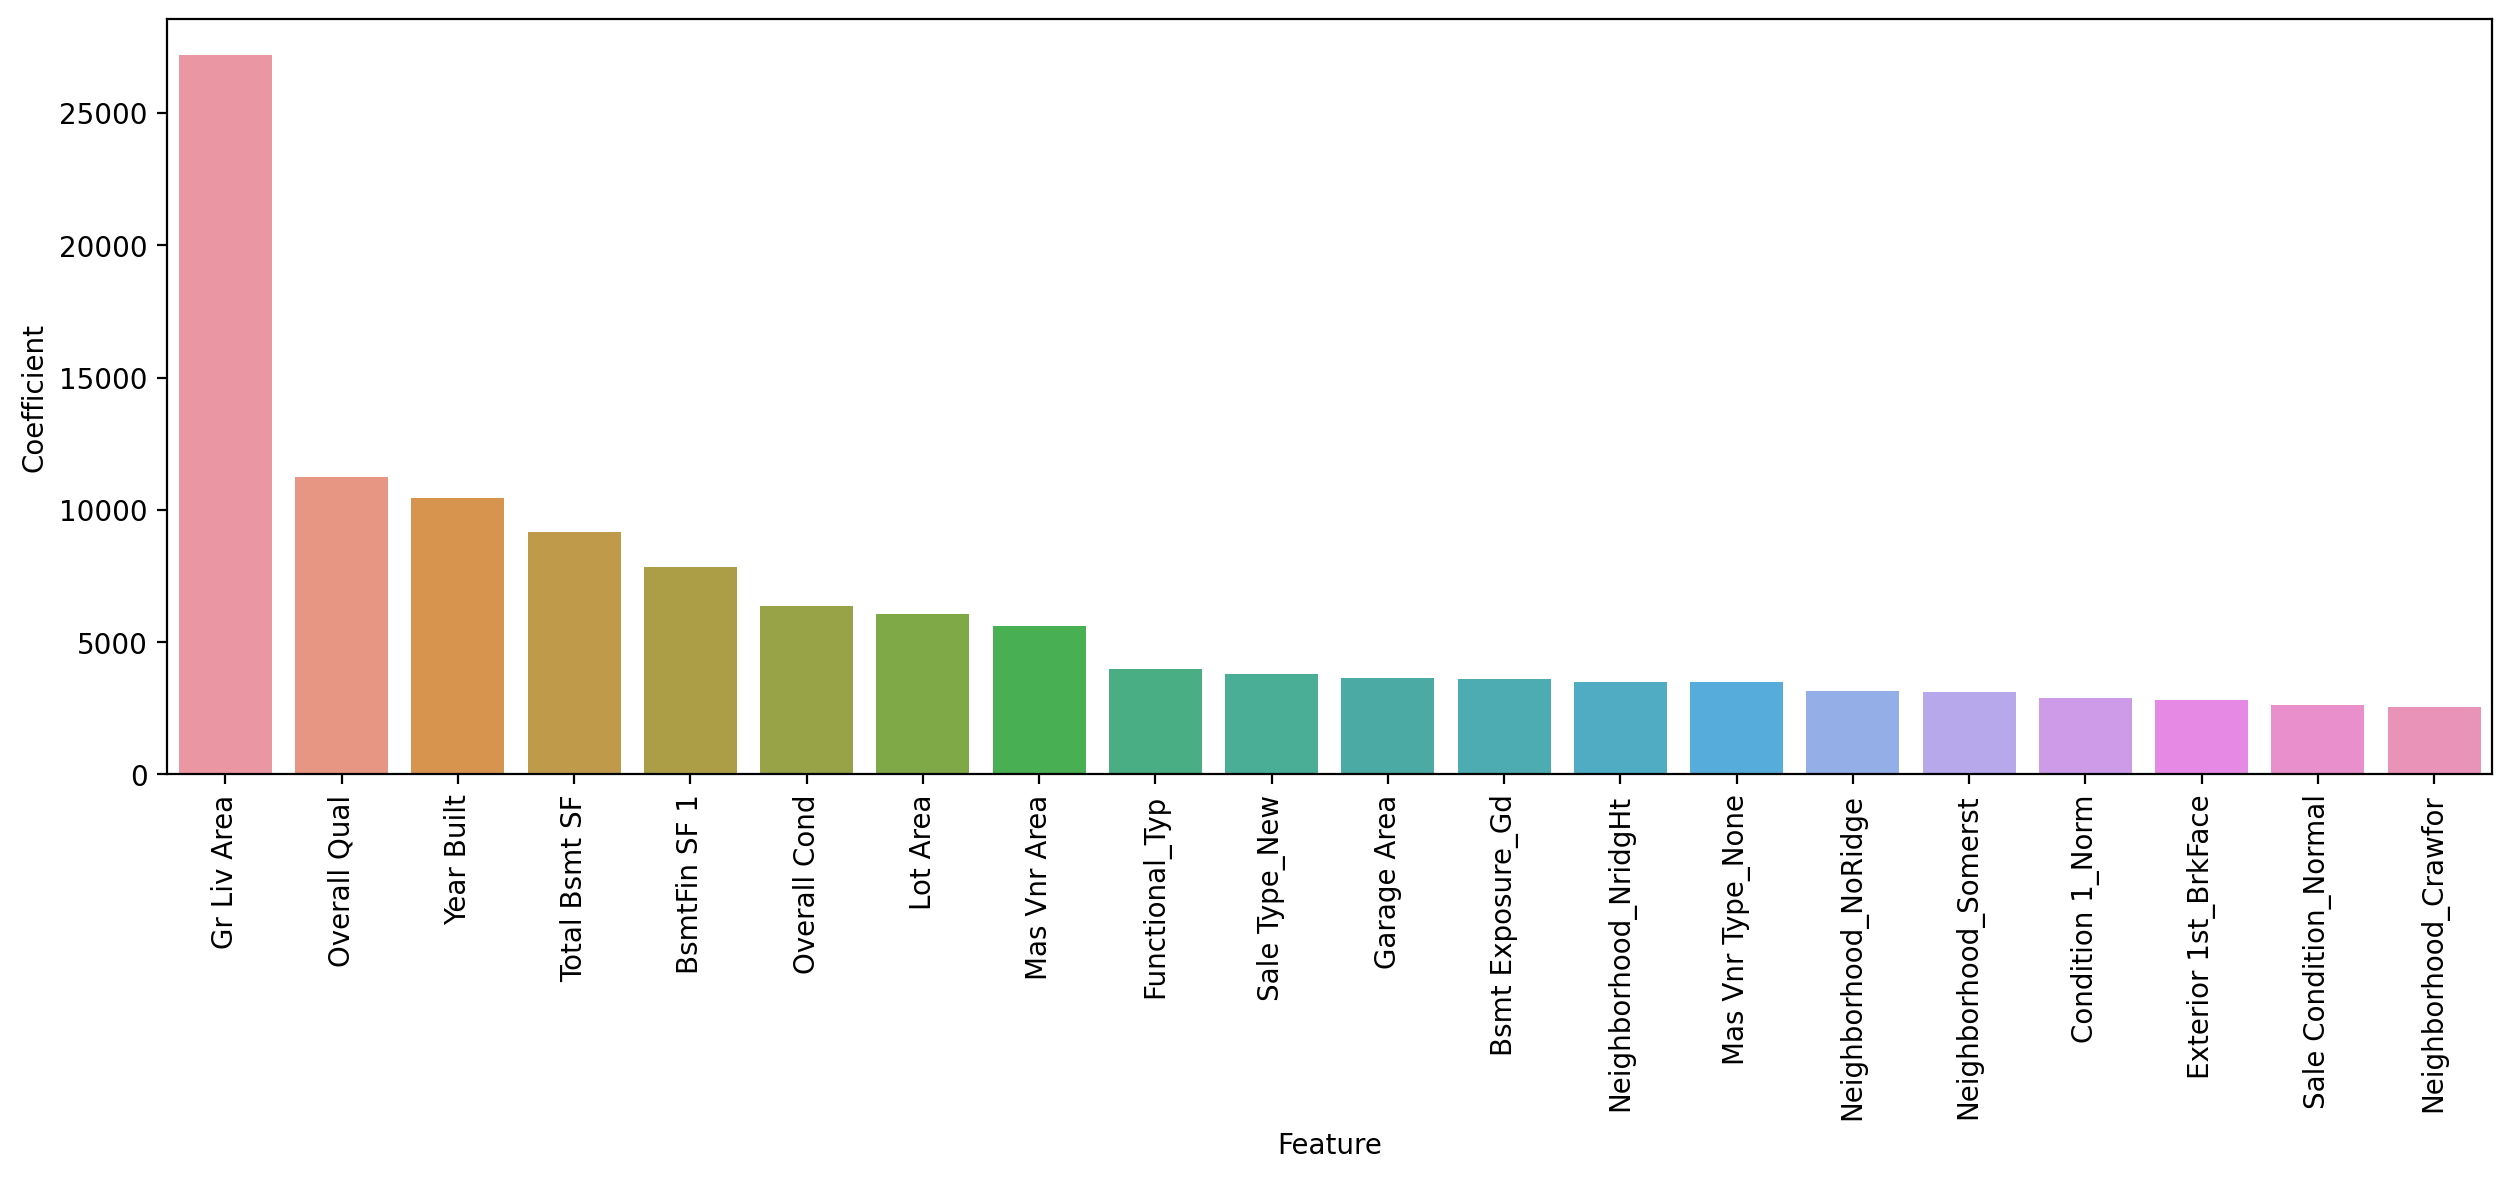

In [204]:
plt.figure(figsize=(15,5), dpi = 200)
sns.barplot(data=imp_feat.head(20), x = 'Feature', y ='Coefficient')
plt.xticks(rotation=90);

### Thank You